In [9]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

from env import get_db_url
import wrangle as w
import prepare as p
import matplotlib as mpl
mpl.rcParams["axes.formatter.useoffset"] = False
import os


## 1.) As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

In [10]:
df = w.get_zillow_2017()

In [11]:
df = w.wrangle_zillow()

In [12]:
w.check_columns(df)

,Column Name,Number of Unique Values,Unique Values,Number of Null Values,Proportion of Null Values,dtype
6,county,3,"[LA, Orange, Ventura]",0,0.0,object
0,bedrooms,19,"[4, 3, 0, 5, 2, 1, 6, 7, 8, 9, 25, 10, 11, 14,...",0,0.0,int64
1,bathrooms,38,"[2.0, 4.0, 0.0, 1.0, 2.5, 3.5, 3.0, 5.5, 4.5, ...",0,0.0,float64
4,year_built,153,"[2005, 2011, 1926, 1972, 1973, 1960, 1950, 195...",0,0.0,int64
2,finished_area,10557,"[3633, 1620, 2077, 1200, 171, 203, 1244, 1300,...",0,0.0,int64
3,home_value,588178,"[296425, 847770, 646760, 5328, 6920, 14166, 16...",0,0.0,int64
5,tax_amount,915868,"[6941.39, 10244.94, 7924.68, 91.6, 255.17, 163...",0,0.0,float64


In [13]:
df.head()

,bedrooms,bathrooms,finished_area,home_value,year_built,tax_amount,county
4,4,2.0,3633,296425,2005,6941.39,LA
6,3,4.0,1620,847770,2011,10244.94,LA
7,3,2.0,2077,646760,1926,7924.68,LA
11,0,0.0,1200,5328,1972,91.60,LA
14,0,0.0,171,6920,1973,255.17,LA


In [14]:
df.home_value.describe()

count    2.140235e+06
mean     4.606416e+05
std      6.771576e+05
min      2.200000e+01
25%      1.891660e+05
50%      3.282960e+05
75%      5.346060e+05
max      9.018846e+07
Name: home_value, dtype: float64

## 2.) Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [15]:
train, validate, test = w.split_continuous(df)

Train: 0.5599997196569536
Validate: 0.24000028034304643
Test: 0.2


In [16]:
train.head(3)

,bedrooms,bathrooms,finished_area,home_value,year_built,tax_amount,county
1937068,4,2.5,2154,910679,2001,11079.60,Orange
1201703,3,2.0,1224,66845,1952,1198.53,LA
751562,4,3.0,2358,247161,1972,3060.88,Orange


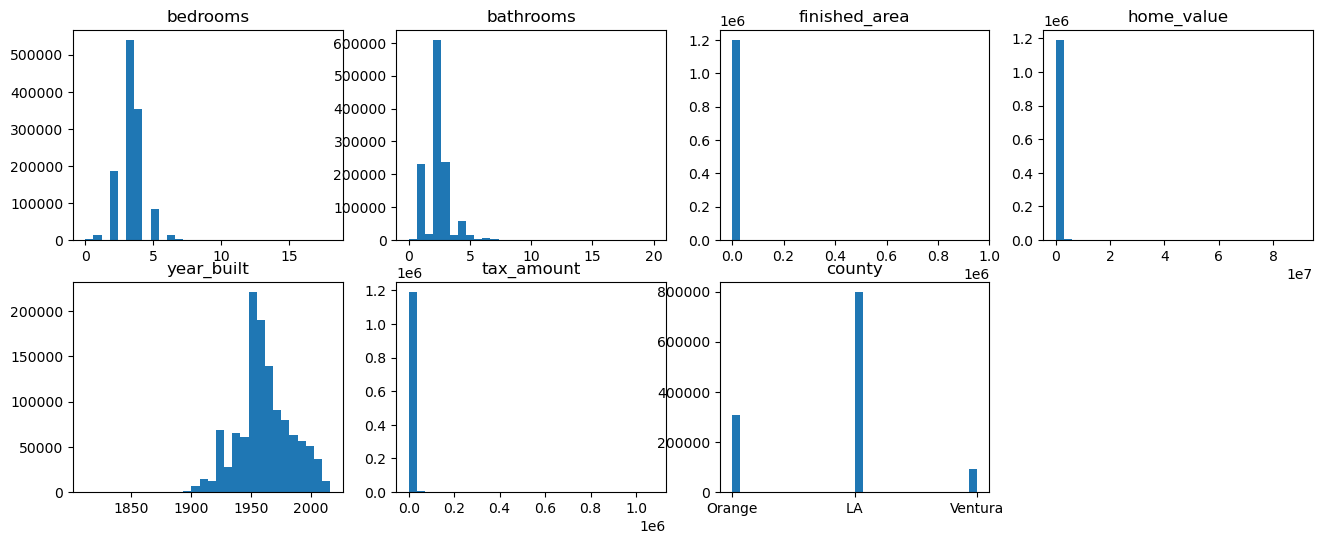

In [17]:
plt.figure(figsize=(16,6))
for i, col in enumerate(train.columns):
    plot_num = i+1
    plt.subplot(2,4, plot_num)
    plt.title(col)
    train[col].hist(bins=30)
    plt.grid(False)

## 3.) Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [18]:
def plot_variable_pairs(df):
    sns.pairplot(df.sample(30000),kind='reg', hue='county')
    plt.show()

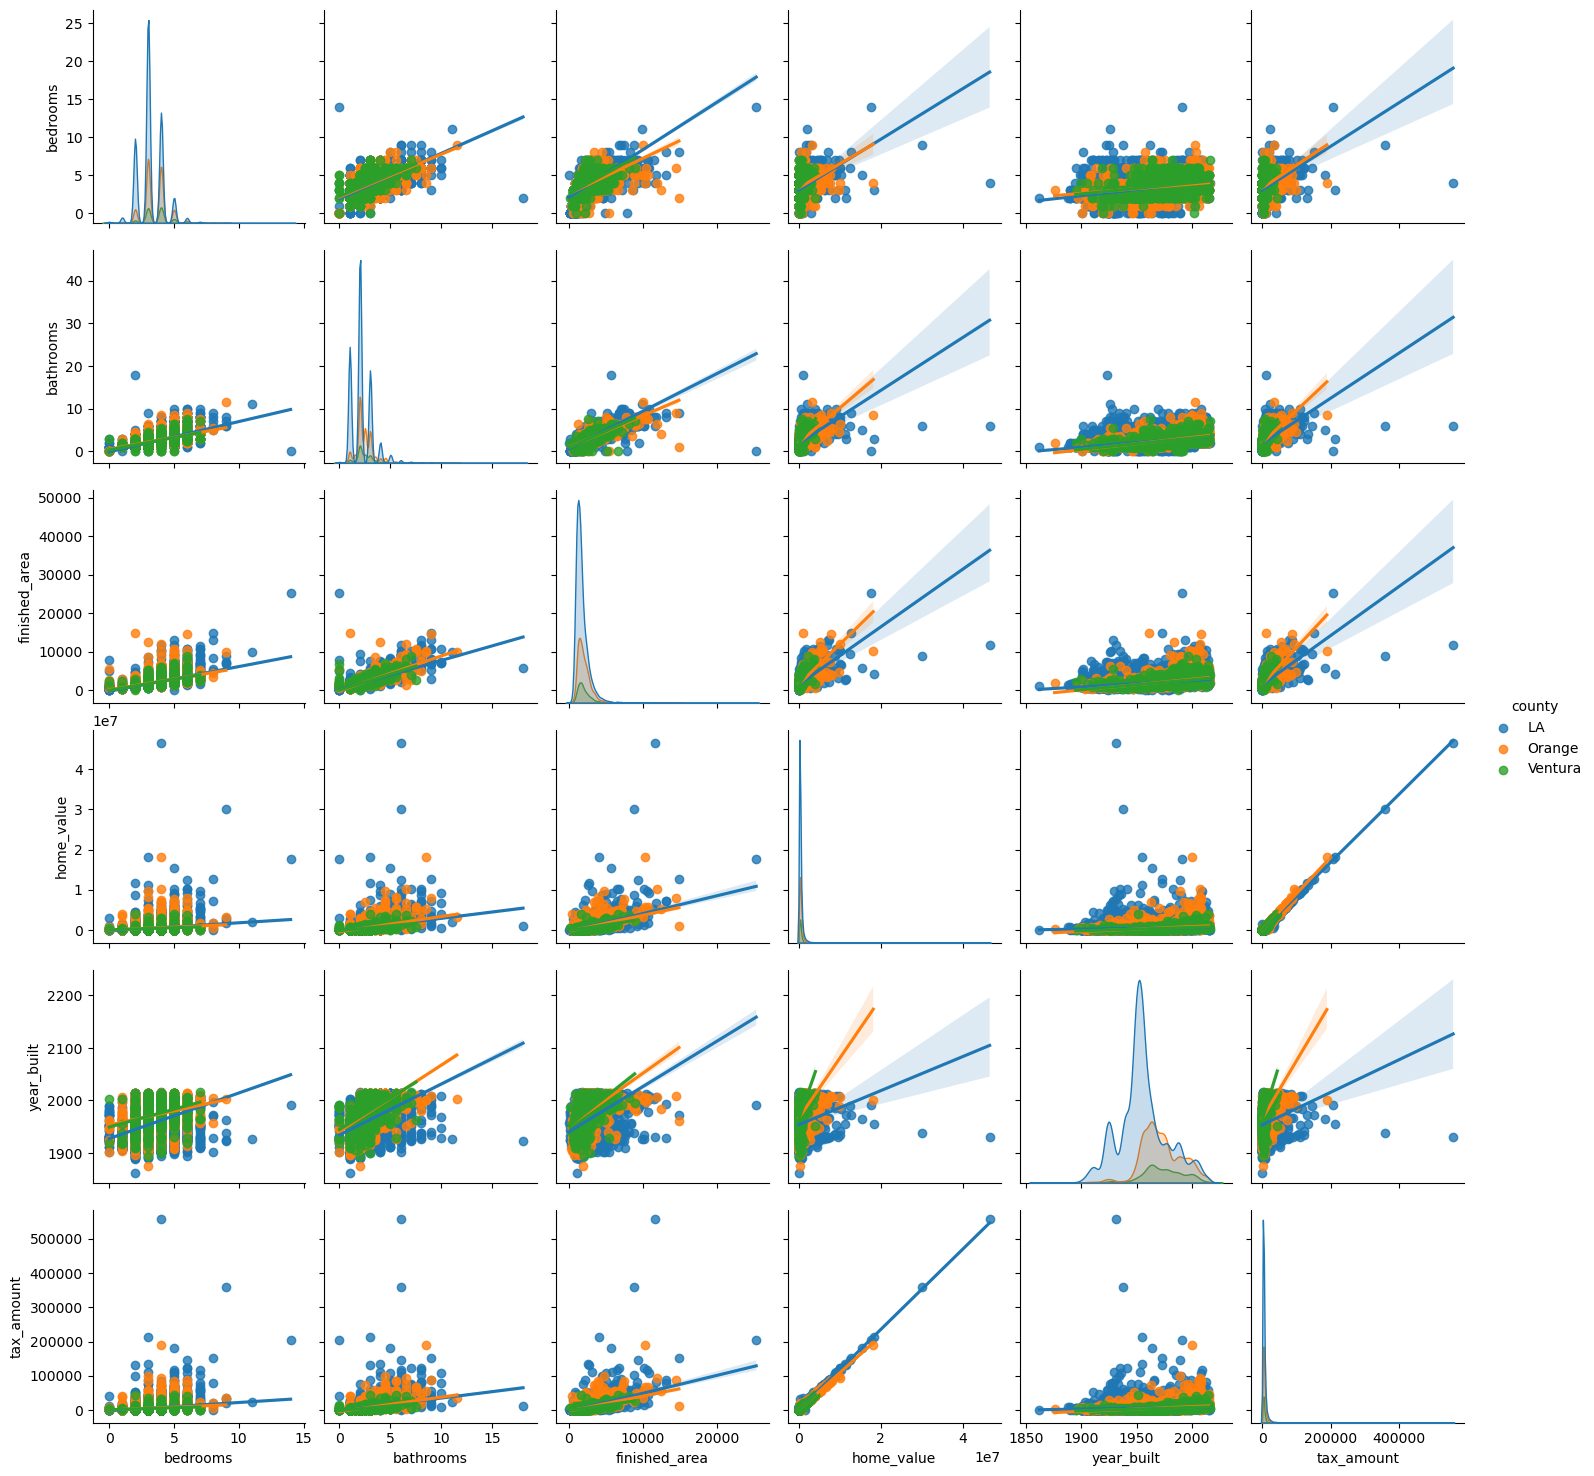

In [11]:
plot_variable_pairs(train)

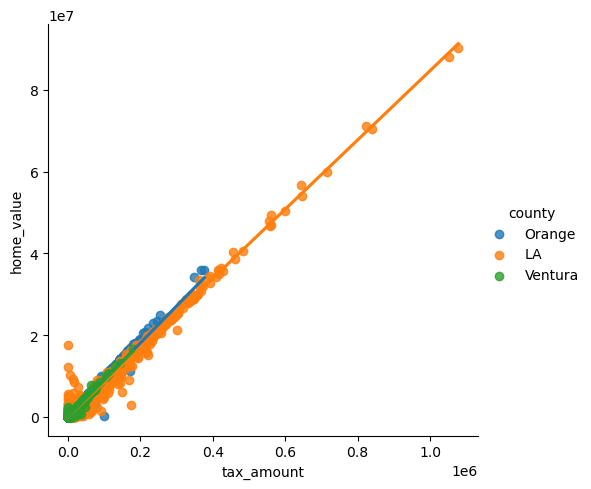

In [12]:
sns.lmplot(data=train, x='tax_amount', y='home_value', hue='county')

## 4.) Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [19]:
train['cat_bedrooms'] = train.bedrooms.astype(str)


In [20]:
train['cat_bathrooms'] = train.bathrooms.astype(str)

In [21]:
train['decade'] = (10 * (train['year_built'] // 10)).astype(str) + 's'

In [22]:
train.head()

,bedrooms,bathrooms,finished_area,home_value,year_built,tax_amount,county,cat_bedrooms,cat_bathrooms,decade
1937068,4,2.5,2154,910679,2001,11079.60,Orange,4,2.5,2000s
1201703,3,2.0,1224,66845,1952,1198.53,LA,3,2.0,1950s
751562,4,3.0,2358,247161,1972,3060.88,Orange,4,3.0,1970s
235077,3,2.0,1513,70917,1965,1119.54,Orange,3,2.0,1960s
1991181,3,3.0,2004,711410,2005,7652.36,Ventura,3,3.0,2000s


In [30]:
train.home_value.max()

90188462

In [23]:
train.decade.unique()

array(['2000s', '1950s', '1970s', '1960s', '1980s', '1910s', '1930s',
       '1940s', '1920s', '1990s', '1900s', '2010s', '1890s', '1880s',
       '1810s', '1850s', '1870s', '1860s', '1820s'], dtype=object)

In [24]:
train.cat_bedrooms.unique()

array(['4', '3', '5', '2', '1', '7', '9', '6', '0', '8', '10', '11', '16',
       '13', '18', '14', '15', '12'], dtype=object)

In [25]:
train.dtypes

bedrooms           int64
bathrooms        float64
finished_area      int64
home_value         int64
year_built         int64
tax_amount       float64
county            object
cat_bedrooms      object
cat_bathrooms     object
decade            object
dtype: object

In [26]:
decade_order = ['1810s', '1820s','1850s', '1860s','1870s','1880s','1890s','1900s','1910s','1920s', '1930s','1940s', '1950s', '1960s','1970s','1980s','1990s','2000s', '2010s']

In [29]:
def plot_categorical_and_continuous_vars(df, x, y, order):
    plt.figure(figsize=(16,9))
    
    sns.catplot(data= df, x= x, y= y, hue='county', order=order)
    plt.title(f'catplot of {x} vs {y}')
    plt.xticks(rotation='vertical')
    plt.xlim() 
    plt.show()
    print('~~~~~~~~~~~~~~~~~~')
    plt.figure(figsize=(16,9))
    sns.barplot(data=df, x= x, y=y, order=order)
    plt.title(f'bargraph of {x} vs {y}')
    plt.xticks(rotation='vertical')
    plt.show()
    print('~~~~~~~~~~~~~~~~~~')
    plt.figure(figsize=(16,9))
    sns.violinplot(data=df, x=x,y=y, hue='county', order=order)
    plt.title(f' {x} vs {y}')
    plt.xticks(rotation='vertical')
    plt.show()
    print('~~~~~~~~~~~~~~~~~~')


<Figure size 1600x900 with 0 Axes>

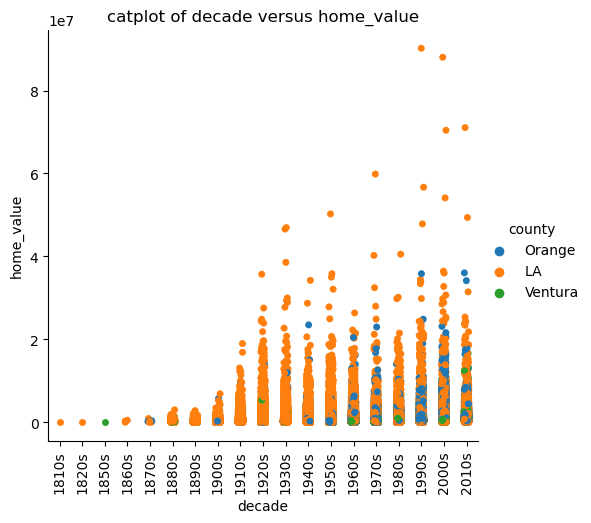

~~~~~~~~~~~~~~~~~~


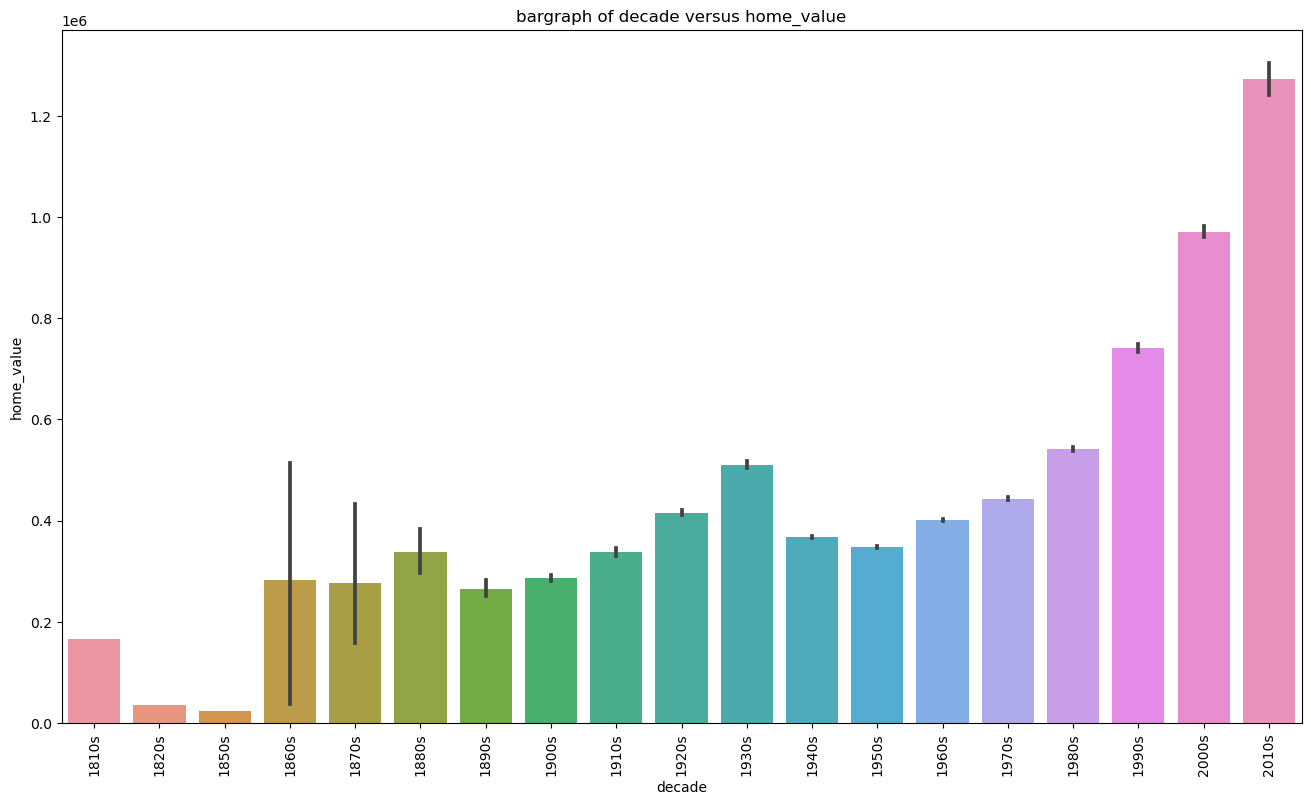

~~~~~~~~~~~~~~~~~~


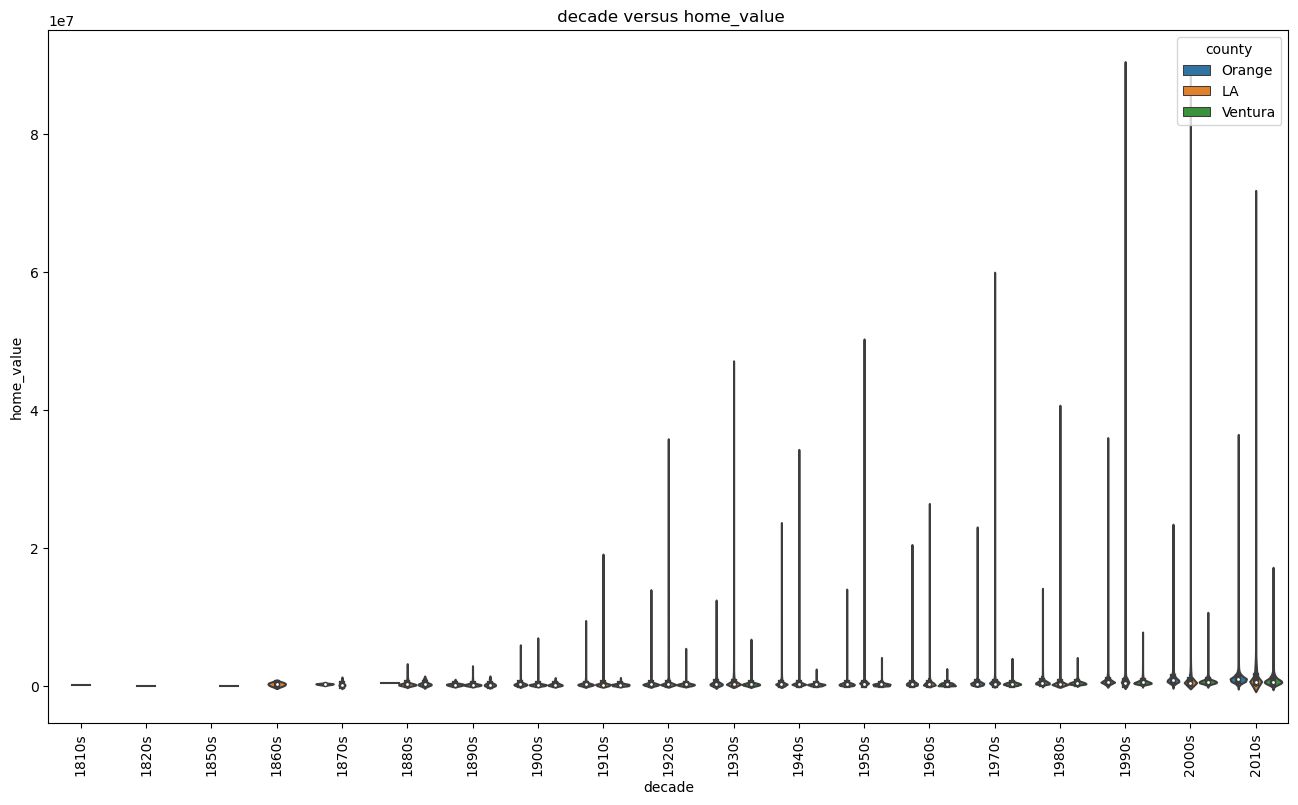

~~~~~~~~~~~~~~~~~~


In [28]:
plot_categorical_and_continuous_vars(train,'decade' ,'home_value',decade_order)
